<a href="https://colab.research.google.com/github/prajeet26/Check-That-Asatya/blob/main/bank_risk_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.metrics import f1_score, accuracy_score

appl = pd.read_csv('/content/drive/MyDrive/applicant.csv')
loan = pd.read_csv('/content/drive/MyDrive/loan.csv')

In [9]:
appl.head()


,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0


In [10]:
loan.head()

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


In [11]:
appl.shape



(1000, 15)

In [12]:
loan.shape

(1000, 13)

In [13]:
appl.describe

<bound method NDFrame.describe of      applicant_id  Primary_applicant_age_in_years  Gender  \
0         1469590                              67    male   
1         1203873                              22  female   
2         1432761                              49    male   
3         1207582                              45    male   
4         1674436                              53    male   
..            ...                             ...     ...   
995       1880194                              31  female   
996       1114064                              40    male   
997       1758046                              38    male   
998       1824545                              23    male   
999       1660770                              27    male   

                 Marital_status  Number_of_dependents   Housing  \
0                        single                     1       own   
1    divorced/separated/married                     1       own   
2                        single 

In [14]:
from tabulate import tabulate
print(tabulate(appl.head(), headers = 'keys', tablefmt = 'psql'))

+----+----------------+----------------------------------+----------+----------------------------+------------------------+-----------+------------------------------+-----------------------------+----------------------------------+---------------------------------+---------------------------------------+------------------+---------------------------+------------------------------------------------------------+------------------------------------------------------------+
|    |   applicant_id |   Primary_applicant_age_in_years | Gender   | Marital_status             |   Number_of_dependents | Housing   |   Years_at_current_residence | Employment_status           | Has_been_employed_for_at_least   | Has_been_employed_for_at_most   | Telephone                             |   Foreign_worker | Savings_account_balance   |   Balance_in_existing_bank_account_(lower_limit_of_bucket) | Balance_in_existing_bank_account_(upper_limit_of_bucket)   |
|----+----------------+---------------------------

In [15]:
from tabulate import tabulate
print(tabulate(loan.head(), headers = 'keys', tablefmt = 'psql'))

+----+--------------------------------------+----------------+-------------------------+----------------------+-------------------------+-----------------------------------------------+---------------------------------------------------+-------------------+-----------------+-------------------+-----------------------------------------+----------------------------------------+-----------------------+
|    | loan_application_id                  |   applicant_id |   Months_loan_taken_for | Purpose              |   Principal_loan_amount |   EMI_rate_in_percentage_of_disposable_income | Property                                          |   Has_coapplicant |   Has_guarantor |   Other_EMI_plans |   Number_of_existing_loans_at_this_bank | Loan_history                           |   high_risk_applicant |
|----+--------------------------------------+----------------+-------------------------+----------------------+-------------------------+-----------------------------------------------+---------

In [16]:
print(tabulate(appl.describe(), headers = 'keys', tablefmt = 'psql'))

+-------+------------------+----------------------------------+------------------------+------------------------------+------------------+
|       |     applicant_id |   Primary_applicant_age_in_years |   Number_of_dependents |   Years_at_current_residence |   Foreign_worker |
|-------+------------------+----------------------------------+------------------------+------------------------------+------------------|
| count |   1000           |                        1000      |            1000        |                   1000       |      1000        |
| mean  |      1.51476e+06 |                          35.546  |               1.155    |                      2.845   |         0.963    |
| std   | 228676           |                          11.3755 |               0.362086 |                      1.10372 |         0.188856 |
| min   |      1.10536e+06 |                          19      |               1        |                      1       |         0        |
| 25%   |      1.3214e+06  

In [17]:
appl.dtypes

applicant_id                                                 int64
Primary_applicant_age_in_years                               int64
Gender                                                      object
Marital_status                                              object
Number_of_dependents                                         int64
Housing                                                     object
Years_at_current_residence                                   int64
Employment_status                                           object
Has_been_employed_for_at_least                              object
Has_been_employed_for_at_most                               object
Telephone                                                   object
Foreign_worker                                               int64
Savings_account_balance                                     object
Balance_in_existing_bank_account_(lower_limit_of_bucket)    object
Balance_in_existing_bank_account_(upper_limit_of_bucket)    ob

In [18]:
appl.isnull().sum()

applicant_id                                                  0
Primary_applicant_age_in_years                                0
Gender                                                        0
Marital_status                                                0
Number_of_dependents                                          0
Housing                                                       0
Years_at_current_residence                                    0
Employment_status                                             0
Has_been_employed_for_at_least                               62
Has_been_employed_for_at_most                               253
Telephone                                                   596
Foreign_worker                                                0
Savings_account_balance                                     183
Balance_in_existing_bank_account_(lower_limit_of_bucket)    668
Balance_in_existing_bank_account_(upper_limit_of_bucket)    457
dtype: int64

In [19]:
loan.drop(["loan_application_id"], axis = 1, inplace=True)

In [20]:
loan.sample(4)

,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
961,1584674,21,new vehicle,2353000,1,building society savings agreement/life insurance,0,0,NaN,2,delay in paying off loans in the past,0
332,1392044,60,new vehicle,7408000,4,building society savings agreement/life insurance,0,0,NaN,1,existing loans paid back duly till now,1
580,1442676,18,new vehicle,1056000,3,real estate,0,1,bank,2,critical/pending loans at other banks,1
701,1178282,48,used vehicle,6331000,4,NaN,0,0,NaN,2,critical/pending loans at other banks,1


In [21]:
final=pd.merge(loan,appl,on="applicant_id")

In [22]:
final.head()

,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,...,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,...,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,...,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,1432761,12,education,2096000,2,real estate,0,0,NaN,1,...,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
3,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,...,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
4,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,2,...,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0


In [23]:
final.describe()

,applicant_id,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,high_risk_applicant,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Foreign_worker
count,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.514763e+06,20.903000,3.271258e+06,2.973000,0.041000,0.052000,1.407000,0.300000,35.546000,1.155000,2.845000,0.963000
std,2.286764e+05,12.058814,2.822737e+06,1.118715,0.198389,0.222138,0.577654,0.458487,11.375469,0.362086,1.103718,0.188856
min,1.105364e+06,4.000000,2.500000e+05,1.000000,0.000000,0.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.321398e+06,12.000000,1.365500e+06,2.000000,0.000000,0.000000,1.000000,0.000000,27.000000,1.000000,2.000000,1.000000
50%,1.529114e+06,18.000000,2.319500e+06,3.000000,0.000000,0.000000,1.000000,0.000000,33.000000,1.000000,3.000000,1.000000
75%,1.707752e+06,24.000000,3.972250e+06,4.000000,0.000000,0.000000,2.000000,1.000000,42.000000,1.000000,4.000000,1.000000
max,1.903505e+06,72.000000,1.842400e+07,4.000000,1.000000,1.000000,4.000000,1.000000,75.000000,2.000000,4.000000,1.000000


In [24]:
final['Principal_loan_amount']=final['Principal_loan_amount'].div(100000).round(2)#FOR CONVINIENCE MADE AMOUNT INTO LAKHS

In [25]:
final.describe()

,applicant_id,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,high_risk_applicant,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Foreign_worker
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.514763e+06,20.903000,32.712580,2.973000,0.041000,0.052000,1.407000,0.300000,35.546000,1.155000,2.845000,0.963000
std,2.286764e+05,12.058814,28.227369,1.118715,0.198389,0.222138,0.577654,0.458487,11.375469,0.362086,1.103718,0.188856
min,1.105364e+06,4.000000,2.500000,1.000000,0.000000,0.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.321398e+06,12.000000,13.655000,2.000000,0.000000,0.000000,1.000000,0.000000,27.000000,1.000000,2.000000,1.000000
50%,1.529114e+06,18.000000,23.195000,3.000000,0.000000,0.000000,1.000000,0.000000,33.000000,1.000000,3.000000,1.000000
75%,1.707752e+06,24.000000,39.722500,4.000000,0.000000,0.000000,2.000000,1.000000,42.000000,1.000000,4.000000,1.000000
max,1.903505e+06,72.000000,184.240000,4.000000,1.000000,1.000000,4.000000,1.000000,75.000000,2.000000,4.000000,1.000000


In [26]:
final.drop(["applicant_id"], axis = 1, inplace=True)

In [27]:
pd.options.display.max_columns = None

In [28]:
final.sample(4)

,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
516,6,new vehicle,13.61,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0,40,male,single,2,own,4,unskilled - resident,0 year,1 year,NaN,0,Low,NaN,0
351,9,FF&E,9.59,1,car or other,0,0,NaN,1,existing loans paid back duly till now,1,29,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,0,Low,0,2 lac
804,12,new vehicle,74.72,1,real estate,0,0,NaN,1,existing loans paid back duly till now,0,24,female,divorced/separated/married,1,rent,2,unemployed / unskilled - non-resident,NaN,0 year,NaN,1,NaN,0,2 lac
334,24,FF&E,41.10,3,NaN,0,0,bank,2,no loans taken/all loans paid back duly,1,23,male,single,2,rent,4,skilled employee / official,7 years,NaN,NaN,1,Low,NaN,0


In [29]:
pd.unique(final['Loan_history'])

array(['critical/pending loans at other banks',
       'existing loans paid back duly till now',
       'delay in paying off loans in the past',
       'no loans taken/all loans paid back duly',
       'all loans at this bank paid back duly'], dtype=object)

In [30]:
pd.unique(final['Employment_status'])

array(['skilled employee / official', 'unskilled - resident',
       'management / self-employed / highly qualified employee / officer',
       'unemployed / unskilled - non-resident'], dtype=object)

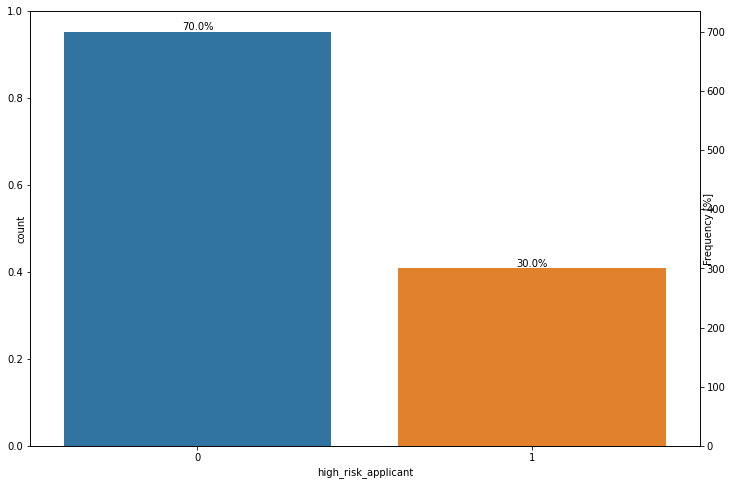

In [31]:
#FREQUENCY COUNT
import matplotlib.ticker as ticker
ncount=len(final)
plt.figure(figsize=(12,8))
ax = sns.countplot(x="high_risk_applicant", data=final, order=[0,1])
ax2=ax.twinx()
ax2.yaxis.tick_left()
ax.yaxis.tick_right()
ax2.set_ylabel('Frequency [%]')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y),ha='center', va='bottom')

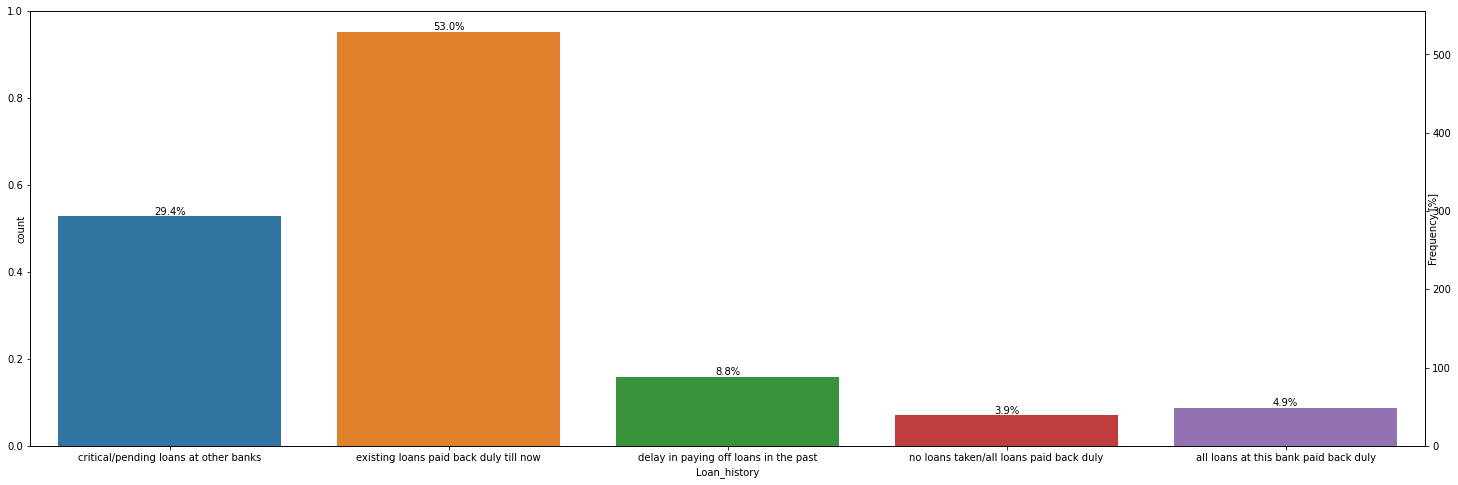

In [54]:
#FREQUENCY COUNT
import matplotlib.ticker as ticker
ncount=len(final)
plt.figure(figsize=(25,8))
ax = sns.countplot(x="Loan_history", data=final, order=['critical/pending loans at other banks',
       'existing loans paid back duly till now',
       'delay in paying off loans in the past',
       'no loans taken/all loans paid back duly',
       'all loans at this bank paid back duly'])
ax2=ax.twinx()
ax2.yaxis.tick_left()
ax.yaxis.tick_right()
ax2.set_ylabel('Frequency [%]')
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y),ha='center', va='bottom')
    

In [32]:
pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


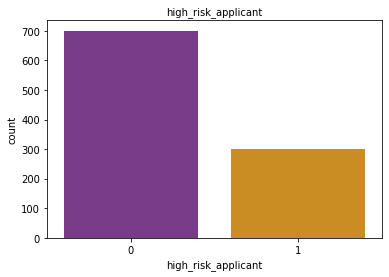

In [33]:
sns.countplot(final["high_risk_applicant"], palette='CMRmap')
plt.title("high_risk_applicant",fontsize=10)
plt.show()

In [34]:
#Scatterplot matrix
import plotly.express as px
df = final
fig = px.scatter_matrix(df,
    dimensions=["Principal_loan_amount", "Primary_applicant_age_in_years","Months_loan_taken_for"],
    color="high_risk_applicant",height=900)
fig.show()

In [35]:
#Removing outliers
final= final[final["Principal_loan_amount"]<=160]
final= final[final["Months_loan_taken_for"]<=70]

In [36]:
#Scatterplot matrix
import plotly.express as px
df = final
fig = px.scatter_matrix(df,
    dimensions=["Principal_loan_amount", "Primary_applicant_age_in_years","Months_loan_taken_for"],
    color="high_risk_applicant",height=900)
fig.show()

In [37]:
data=final
fig = px.box(data, x="Employment_status", y="Primary_applicant_age_in_years", color="high_risk_applicant",
color_discrete_sequence=px.colors.qualitative.Dark24,
labels={col:col.replace('_', ' ') for col in data.columns},
category_orders={"Employment_status":["unemployed / unskilled - non-resident","management / self-employed / highly qualified employee / officer","unskilled - resident","skilled employee / official"]})
fig.update_layout(legend=dict(orientation="h", yanchor="bottom",
y=1.02, xanchor="right", x=1))
fig.show()

In [38]:
data=final
fig = px.box(data, x="Gender", y="Principal_loan_amount", color="high_risk_applicant",
color_discrete_sequence=px.colors.qualitative.Dark24,
labels={col:col.replace('_', ' ') for col in data.columns},
category_orders={"Gender":["Male","Female"]})
fig.update_layout(legend=dict(orientation="h", yanchor="bottom",
y=1.02, xanchor="right", x=1))
fig.show()

In [39]:
data=final
fig = px.box(data, x="Loan_history", y="Primary_applicant_age_in_years", color="high_risk_applicant",
color_discrete_sequence=px.colors.qualitative.Dark24,
labels={col:col.replace('_', ' ') for col in data.columns},
category_orders={"Loan_history":['critical/pending loans at other banks',
       'existing loans paid back duly till now',
       'delay in paying off loans in the past',
       'no loans taken/all loans paid back duly',
       'all loans at this bank paid back duly']})
fig.update_layout(legend=dict(orientation="h", yanchor="bottom",
y=1.02, xanchor="right", x=1))
fig.show()

In [40]:
final.dtypes

Months_loan_taken_for                                         int64
Purpose                                                      object
Principal_loan_amount                                       float64
EMI_rate_in_percentage_of_disposable_income                   int64
Property                                                     object
Has_coapplicant                                               int64
Has_guarantor                                                 int64
Other_EMI_plans                                              object
Number_of_existing_loans_at_this_bank                         int64
Loan_history                                                 object
high_risk_applicant                                           int64
Primary_applicant_age_in_years                                int64
Gender                                                       object
Marital_status                                               object
Number_of_dependents                            

In [41]:
fig = px.parallel_categories(final, color_continuous_scale=px.colors.sequential.RdBu, color="high_risk_applicant",
dimensions=["Purpose",'Property','Other_EMI_plans','Loan_history','Gender','Marital_status','Housing','Employment_status','Has_been_employed_for_at_least','Has_been_employed_for_at_most','Telephone','Savings_account_balance','Balance_in_existing_bank_account_(lower_limit_of_bucket)','Balance_in_existing_bank_account_(upper_limit_of_bucket)'], labels={col:col.replace('_', ' ') for col in data.columns})
fig.show()
#["Purpose",'Property','Other_EMI_plans','Loan_history','Gender','Marital_status','Housing','Employment_status','Has_been_employed_for_at_least','Has_been_employed_for_at_most','Telephone','Savings_account_balance','Balance_in_existing_bank_account_(lower_limit_of_bucket)','Balance_in_existing_bank_account_(upper_limit_of_bucket)']

In [42]:
#One hot encoding of categorical variables
df = pd.get_dummies(data=final,columns=["Purpose",'Property','Other_EMI_plans','Loan_history','Gender','Marital_status','Housing','Employment_status','Has_been_employed_for_at_least','Has_been_employed_for_at_most','Telephone','Savings_account_balance','Balance_in_existing_bank_account_(lower_limit_of_bucket)','Balance_in_existing_bank_account_(upper_limit_of_bucket)'])

In [43]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
import sklearn
print (sklearn.__version__)

1.0.2


In [45]:
Y = df['high_risk_applicant']
X = df.drop('high_risk_applicant',axis=1)
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, random_state=0, test_size=.20)

In [46]:
from sklearn.metrics import classification_report
def model_assess(model, name):
  model.fit(x_train, y_train)
  preds = model.predict(x_test)
  preds_proba = model.predict_proba(x_test)
  print('                   ', name, '\n',classification_report(y_test, model.predict(x_test)))
from sklearn.neighbors import KNeighborsClassifier
#KNN
knn=KNeighborsClassifier(n_neighbors=151)
model_assess(knn,'knn')
from sklearn.linear_model import LogisticRegression
#Logistic Regression
lg = LogisticRegression(random_state=0)
model_assess(lg, 'Logistic Regression')
#XGB
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb, 'XGBoost')


                    knn 
               precision    recall  f1-score   support

           0       0.76      1.00      0.86       151
           1       0.00      0.00      0.00        49

    accuracy                           0.76       200
   macro avg       0.38      0.50      0.43       200
weighted avg       0.57      0.76      0.65       200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter)

                    Logistic Regression 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       151
           1       0.50      0.43      0.46        49

    accuracy                           0.76       200
   macro avg       0.66      0.64      0.65       200
weighted avg       0.74      0.76      0.75       200

                    XGBoost 
               precision    recall  f1-score   support

           0       0.81      0.84      0.83       151
           1       0.45      0.41      0.43        49

    accuracy                           0.73       200
   macro avg       0.63      0.62      0.63       200
weighted avg       0.73      0.73      0.73       200



NameError: ignored

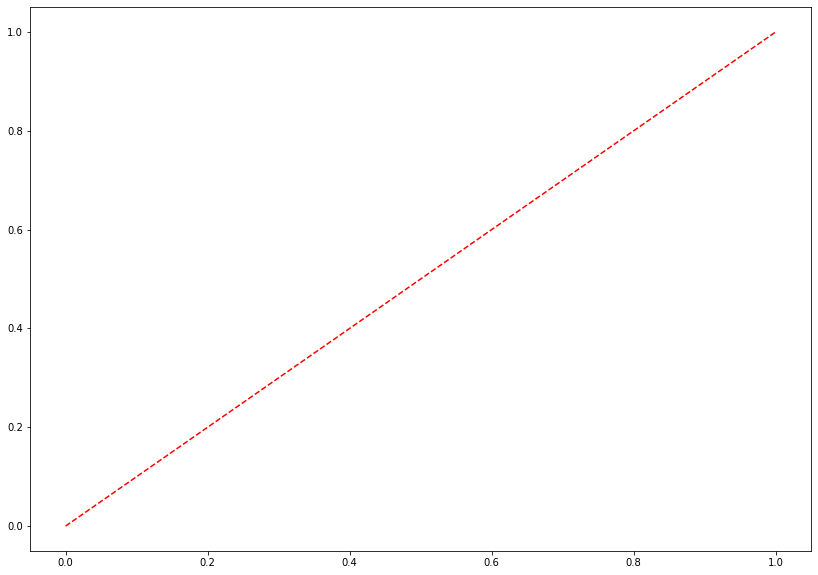

In [56]:
from sklearn.calibration import calibration_curve
from sklearn import metrics
fig = plt.figure(figsize=(14,10))
plt.plot([0, 1], [0, 1],'r--')
#KNN
preds_proba_knn = knn.predict_proba(x_test)
probsknn = preds_proba_knn[:, 1]
fpr, tpr, thresh = metrics.roc_curve(y_test, probsknn)
aucknn = roc_auc_score(y_test, probsknn)
plt.plot(fpr, tpr, label=f'KNN, AUC = {str(round(aucknn,3))}')
#Logistic Regression
preds_proba_lg = lg.predict_proba(x_test)
probslg = preds_proba_lg[:, 1]
fpr, tpr, thresh = metrics.roc_curve(y_test, probslg)
auclg = roc_auc_score(y_test, probslg)
plt.plot(fpr, tpr, label=f'Logistic Regression, AUC = {str(round(auclg,3))}')
#XGBoost
preds_proba_xgb = xgb.predict_proba(x_test)
probsxgb = preds_proba_xgb[:, 1]
fpr, tpr, thresh = metrics.roc_curve(y_test, probsxgb)
aucxgb = roc_auc_score(y_test, probsxgb)
plt.plot(fpr, tpr, label=f'XGBoost, AUC = {str(round(aucxgb,3))}')
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC curve")
plt.rcParams['axes.titlesize'] = 18
plt.legend()
plt.show()


#Reliability plot and Brier Score
fig = plt.figure(figsize=(14,10))
plt.plot([0, 1], [0, 1], color="black")
#KNN
knn_y, knn_x = calibration_curve(y_test, preds_proba[:,1], n_bins=10, normalize=True)
loss_knn = brier_score_loss(y_test, preds_proba[:,1])
plt.plot(knn_x, knn_y, marker='o', label=f'KNN, Brier score = {str(round(loss_knn,3))}')
#Logistic Regression
lg_y, lg_x = calibration_curve(y_test, preds_proba[:,1], n_bins=10, normalize=True)
loss_lg = brier_score_loss(y_test, preds_proba[:,1])
plt.plot(lg_x, lg_y, marker='o',label=f'Logistic Regression, Brier score = {str(round(loss_lg,3))}')
#XGBoost
preds_proba = xgb.predict_proba(x_test)
xgb_y, xgb_x = calibration_curve(y_test, preds_proba[:,1], n_bins=10, normalize=True)
loss_xgb = brier_score_loss(y_test, preds_proba[:,1])
plt.plot(xgb_x, xgb_y, marker='o', label=f'XGBoost, Brier score = {str(round(loss_xgb,3))}')
plt.ylabel("Actual probabilty")
plt.xlabel("Predicted probability")
plt.title("Reliability plot")
plt.rcParams['axes.titlesize'] = 18
plt.legend()
plt.show()

Text(0.5, 0, 'Gain')

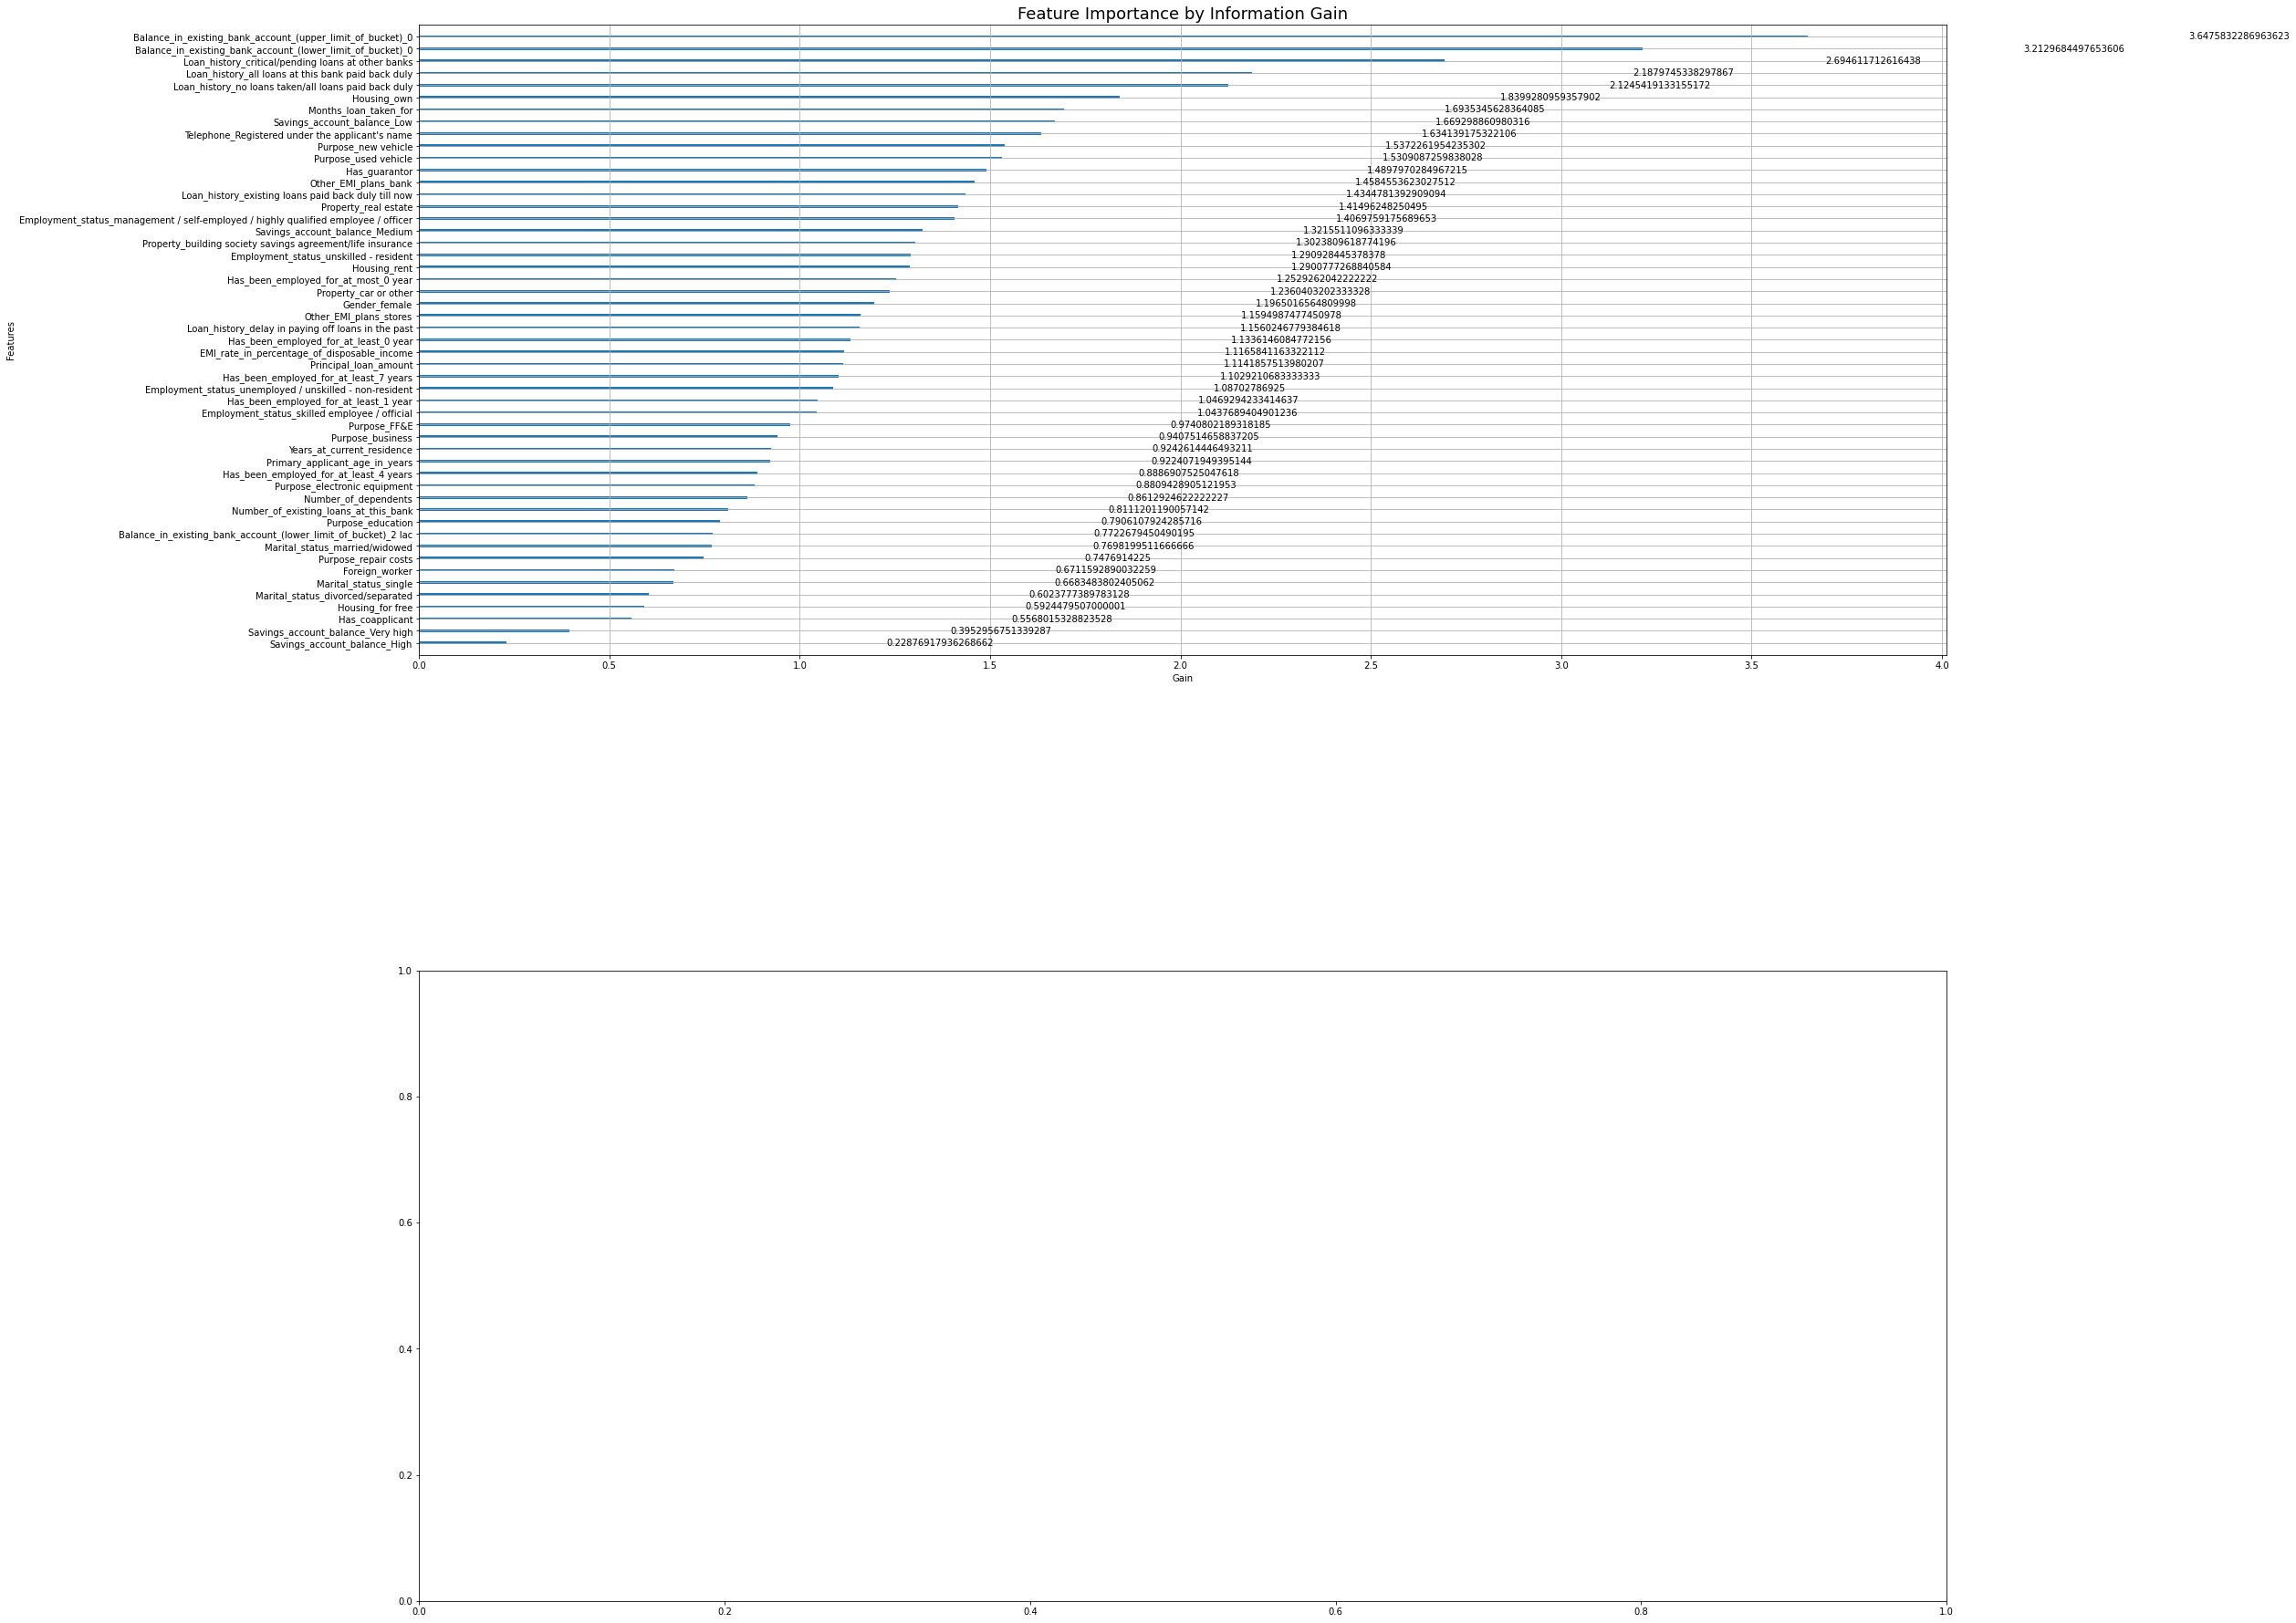

In [65]:

#Feature importance plot
from xgboost import plot_importance
fig, (ax1,ax2) = plt.subplots(figsize = (30, 30), ncols=1, nrows=2)
plt.subplots_adjust(left=0.125, right=0.9, bottom=0.1, top = 0.9, wspace=0, hspace = 0.5)
plot_importance(xgb, importance_type='gain', ax = ax1)
ax1.set_title('Feature Importance by Information Gain', fontsize = 18)
ax1.set_xlabel('Gain')
